    TOPIC: Beyond News Headlines and TF-IDF: Enhancing Text-Based Forecasting Models with Validated Collocations and Improved Attention.
    Author: Gabriel Appau Abeyie

This set of codes perform exploratory data analysis on the target variable and feature set.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import random

In [2]:
Features = pd.read_csv('D:/Python/Untitled Folder/df1.csv')
# Initialize Fred
fred = Fred(api_key='YOUR_API_KEY_HERE')

In [3]:
# create a dictionary mapping the incorrect forms to the correct ones
correction_dict = {
    "accord ing": "according",
    "interna tional": "international",
    "administra tion": "administration",
    "air line": "airline",
    "bar rel": "barrel",
    "invest ment": "investment",
    "bil lion": "billion",
    "mil lion": "million",
    "com pared": "compared",
    "com modities":"commodity",
    "commod ity": "commodity",
    "expecta tions": "expectation",
    "percent age": "percentage",
    "yorkcrude": "york crude",
    "ear lier": "earlier",
    "earn ings": "earnings",
    "econo mist": "economist",
    "euro pean": "european",
    "bar rels": "barrel",
    "pro ducer": "producer",
    "pro ducers": "producer",
    "pro gram": "program",
    "prob lem": "problem",
    "pro duction": "production",
    "daq": "nasdaq",
    "nasnasnasdaq": "nasdaq",
    "fri day": "friday",
    "fourth quarter": "fourthquarter",
    "prod ucts": "product",
    "quar ter": "quarter",
    "chi cago": "chicago",
    "ri ing": "rising",
    "sec ond": "second",
    "sec tor": "sector",
    "securi ties": "securitie",
    "securi tie": "securitie",
    "execu tive": "executive",
    "invest ment": "investment",
    "decem ber": "december",
    "janu ary": "january",
    "mar ket": "market",
    "sev eral": "several",
    "inven tory": "inventory",
    "sell ing": "selling",
    "trad er": "trader",
    "trad ing": "trading",
    "vol ume": "volume",
    "trea sury": "treasury",
    "invento ries": "inventory",
    "inves tor": "investor",
    "web site": "website",
    "invest ment": "investment",
    "invest ments": "investment",
    "yester day": "yesterday",
    "yes terday": "yesterday",
    "wednes day": "wednesday",
    "mer cantile": "mercantile",
    "mercan tile": "mercantile",
    "tues day": "tuesday",
    "mil lion": "million",
    "novem ber": "november",
    "sum mer": "summer",
    "stockindex": "stock index",
    "washingtonpost": "washington post",
    "contin ued": "continued",
    "crudeoil": "crude oil",
    "nasnasdaq": "nasdaq",
    "minuteminute": "minute minute",
    "futuresoptions": "future option",
    "includ ing": "including",
    "inter national": "international",
    "naturalgas": "natural gas",
    "oilbarrel": "oil barrel",
    "outnum bered": "outnumbered",
    "pres sure": "pressure",
    "presi dent": "president",
    "terest": "interest",
    "thur day": "thursday",
    "sup ply": "supply",
    "soy bean": "soybean",
    "inininterest": "interest",
    "ininterest": "interest",
    "fore cast": "forecast",
    "reve nue": "revenue",
    "peo ple": "people",
    "aver age": "average",
    "petro leum": "petroleum",
    "organiza tion": "organization",
    "pipe line": "pipeline",
    "nat ural": "natural",
    "ana lyst": "analyst",
    "ana lysts": "analyst",
    "buy ing": "buying",
    "natu ral": "natural",
    "busi ness": "business",
    "chair man": "chairman",
    "produc tion": "production",
    "ex porting": "exporting",
    "com panies": "company",
    "ara bia": "arabia",
    "larg est": "largest",
    "mem bers": "member",
    "mon day": "monday",
    "com pany": "company",
    "sep tember": "september",
    "septem ber": "september",
    "compa ny": "company",
    "com modity": "commodity",
    "ser vice": "service",
    "ser vices": "service",
    "set tled": "settled",
    "stan dard": "standard",
    "japa nese": "japanese",
    "eco nomic": "economic",
    "commodi tie": "commodity",
    "com posite": "composite",
    "compos ite": "composite",
    "cur rency": "currency",
    "cur rent": "current",
    "bench mark": "benchmark",
    "coun try": "country",
    "fed eral": "federal",
    "japa nese": "japanese",
    "export ing": "exporting",
    "deliv ery": "delivery",
    "depart ment": "department",
    "heatingoil": "heating oil",
    "heat ing": "heating",
    "bluechip": "blue chip",
    "divi sion": "division",
    "dol lar": "dollar",
    "dur ing": "during",
    "harmon": "harman",
    "inter est": "interest",
    "econ omy": "economy",
    "esti mate": "estimate",
    "febru ary": "february",
    "finan cial": "financial",
    "fur ther": "further",
    "gal lon": "gallon",
    "investment officer albany": "investment officer first albany",
    "point face yield": "face yield",
    "gaso line": "gasoline",
    "glo bal": "global",
    "second quarter": "secondquarter",
    "smaller company": "smallercompany", 
    "govern ment": "government",
    "gov ernment": "government",
    "include ing": "including",
    "indus trial": "industrial",
    "indus try": "industry",
    "infla tion": "inflation",
    "novem ber": "november",
    "octo ber": "october",
    "organi zation": "organization",
    "offi cials": "official",
    "manage ment": "management",
    "tech nology": "technology",
    "big gest": "biggest",
    "opera tions": "operation",
    "insti tute": "institute",
    "prec metal indus": "precious metal industry",
    "york stock change": "york stock exchange",
    "mor gan": "morgan"
}

# define a function to apply the corrections
def correct_words(text):
    for incorrect, correct in correction_dict.items():
        text = text.replace(incorrect, correct)
    return text

# apply the function to your text column
Features['cleaned_Text'] = Features['cleaned_Text'].apply(correct_words)

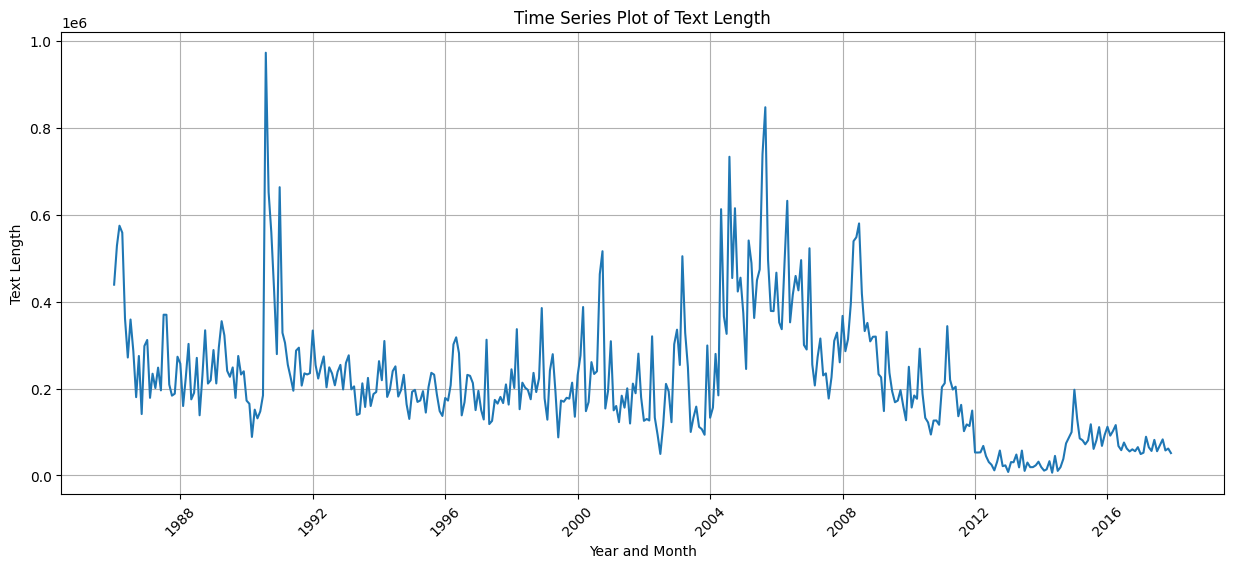

In [20]:
df = Features
df['text_length'] = df['cleaned_Text'].apply(len)
    
plt.figure(figsize=(15, 6))
plt.plot(pd.to_datetime(df['YearMonth']), df['text_length'])
plt.xlabel('Year and Month')
plt.ylabel('Text Length')
plt.title('Time Series Plot of Text Length')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


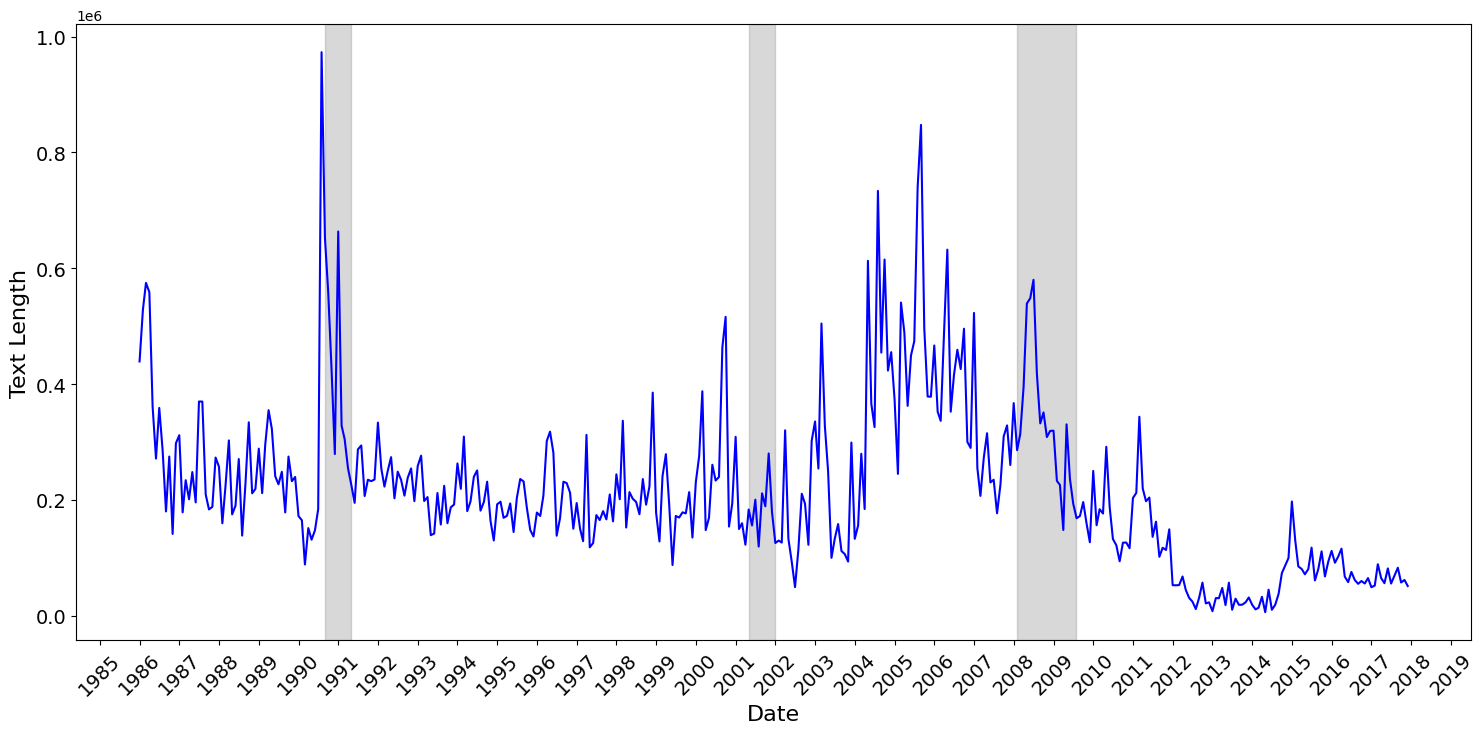

In [60]:
from fredapi import Fred
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Fetch recession data
recessions = fred.get_series('USREC', observation_start='1986-01-01', observation_end='2017-12-01')
recessions = recessions.resample('M').last().ffill()

# Create the plot
plt.figure(figsize=(18, 8))

# Plot NBER recessions
for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    plt.axvspan(start, end, color='gray', alpha=0.3)

# Plot text length
plt.plot(pd.to_datetime(df['YearMonth']), df['text_length'], color='blue')

# Configure the plot
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Text Length', fontsize = 16)
#plt.title('Time Series Plot of Text Length')

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Save the figure as an EPS file
plt.savefig('textlength.eps', format='eps', dpi=300)

plt.grid(False)  # Turn off grid lines
plt.show()

In [62]:
import numpy as np

In [63]:
oil_price = fred.get_series('DCOILWTICO', observation_start='1986-01-01', observation_end='2017-12-01')
monthly_oil = oil_price.resample('M').mean().ffill()
monthly_oil_log = np.log(monthly_oil)
monthly_oil_log_diff = monthly_oil_log.diff()
#monthly_oil_log_diff = monthly_oil_log_diff.fillna(-0.07469787)
monthly_oil_log_diff = monthly_oil_log_diff.dropna()
print(monthly_oil_log_diff.head())

1986-02-28   -0.394332
1986-03-31   -0.203227
1986-04-30    0.018160
1986-05-31    0.180065
1986-06-30   -0.135741
Freq: M, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


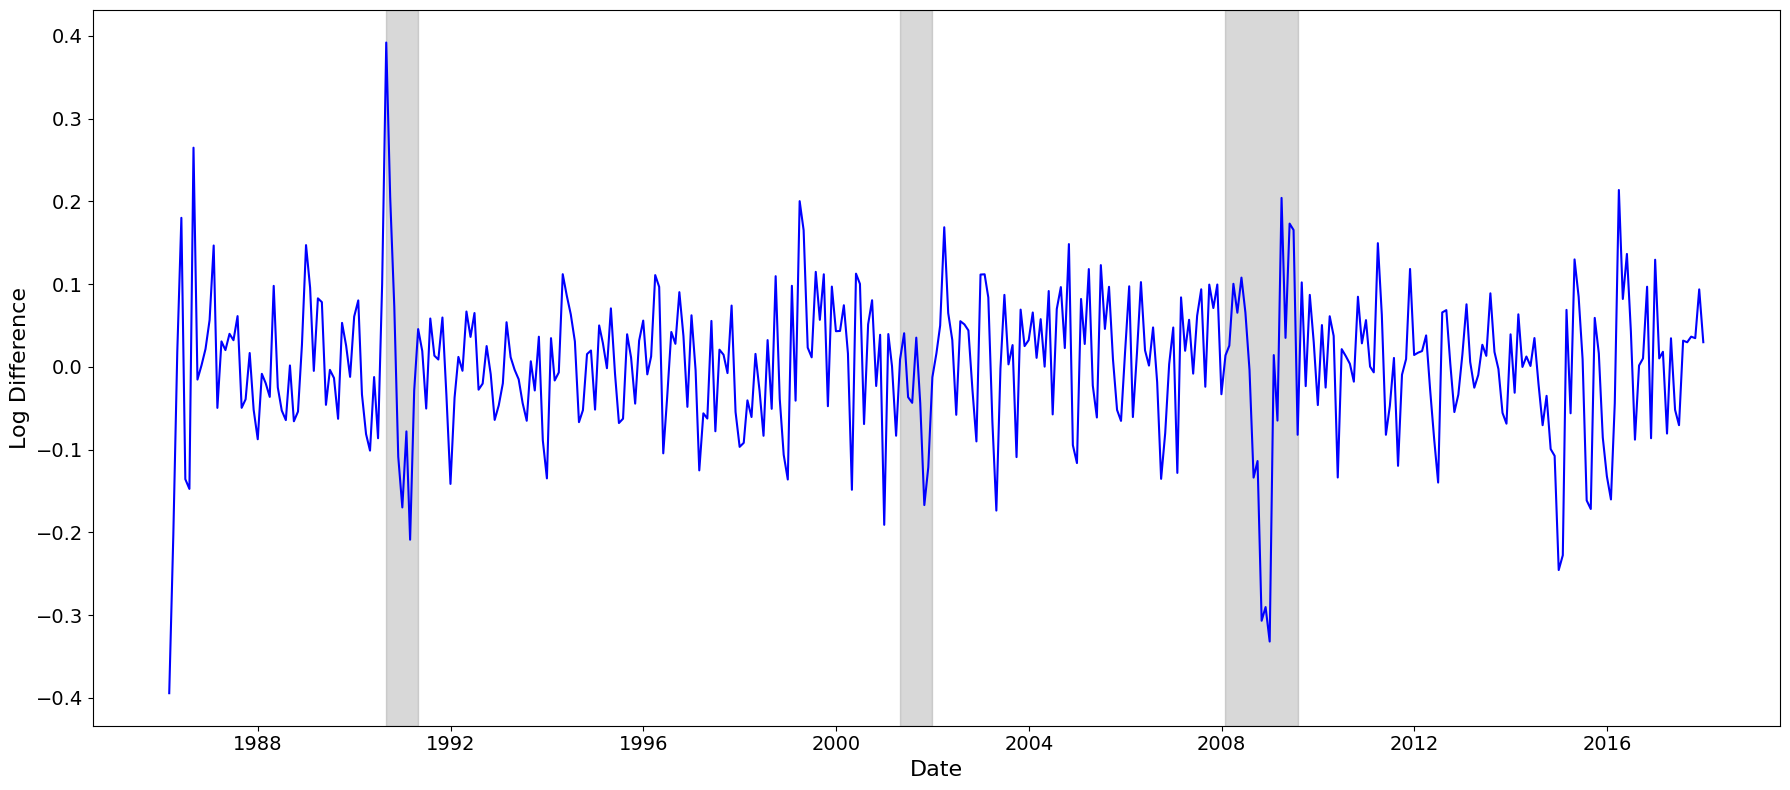

: 

In [66]:
recessions = fred.get_series('USREC', observation_start='1986-01-01', observation_end='2017-12-01')
recessions = recessions.resample('M').last().ffill()

plt.figure(figsize=(18, 8))
plt.plot(monthly_oil_log_diff, label='Monthly log differences of oil prices', color = 'blue')

for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    plt.axvspan(start, end, color='gray', alpha=0.3)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Log Difference', fontsize = 16)
plt.grid(False)
plt.tight_layout()
plt.savefig('target.eps', dpi=600)
plt.show()

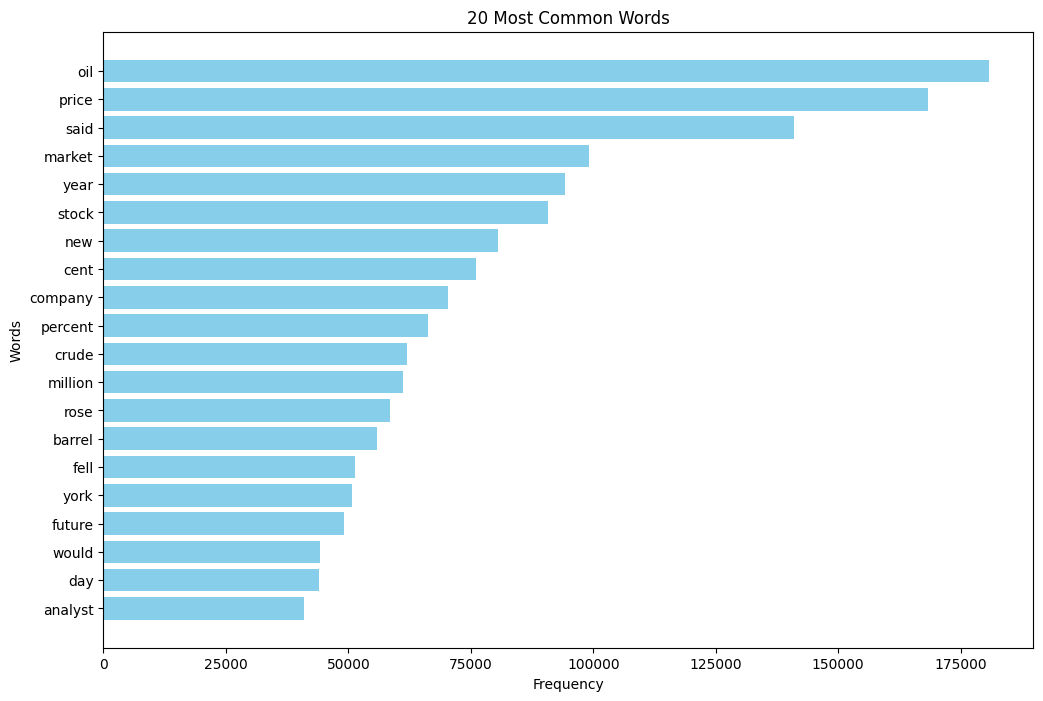

In [7]:
# Tokenize and filter words
all_text = ' '.join(df['cleaned_Text'])
words = nltk.word_tokenize(all_text.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Most common words plot
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)
labels, values = zip(*common_words)
plt.figure(figsize=(12, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('20 Most Common Words')
plt.gca().invert_yaxis()
plt.show()

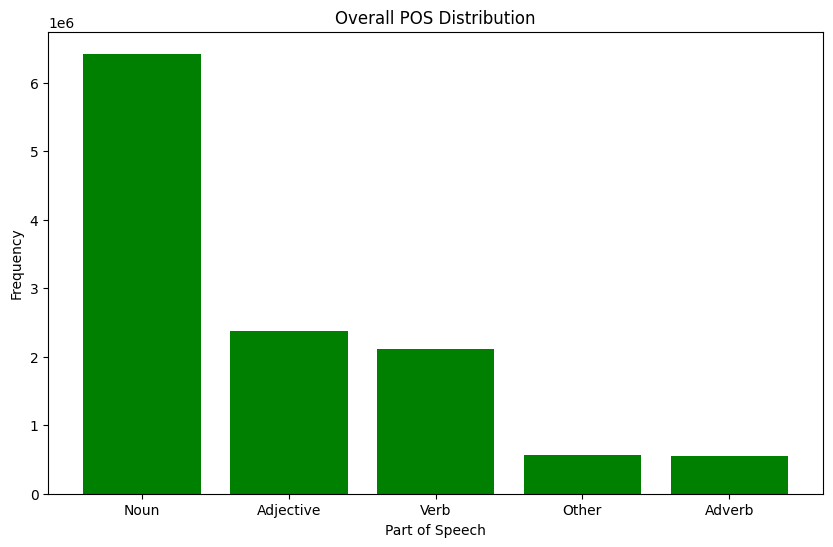

In [12]:
# Tokenize and filter words
all_text = ' '.join(df['cleaned_Text'])
words = nltk.word_tokenize(all_text.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Apply NLTK POS tagging
pos_tags = nltk_pos_tag(filtered_words)

# You can remove or comment out the following line
# pos_tags = [pos_tags(word) for word in filtered_words]  # <-- Remove or comment out this line

# Overall POS distribution plot
pos_freq = Counter(pos_tags)
labels, values = zip(*pos_freq.items())
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='blue')
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Overall POS Distribution')
plt.show()

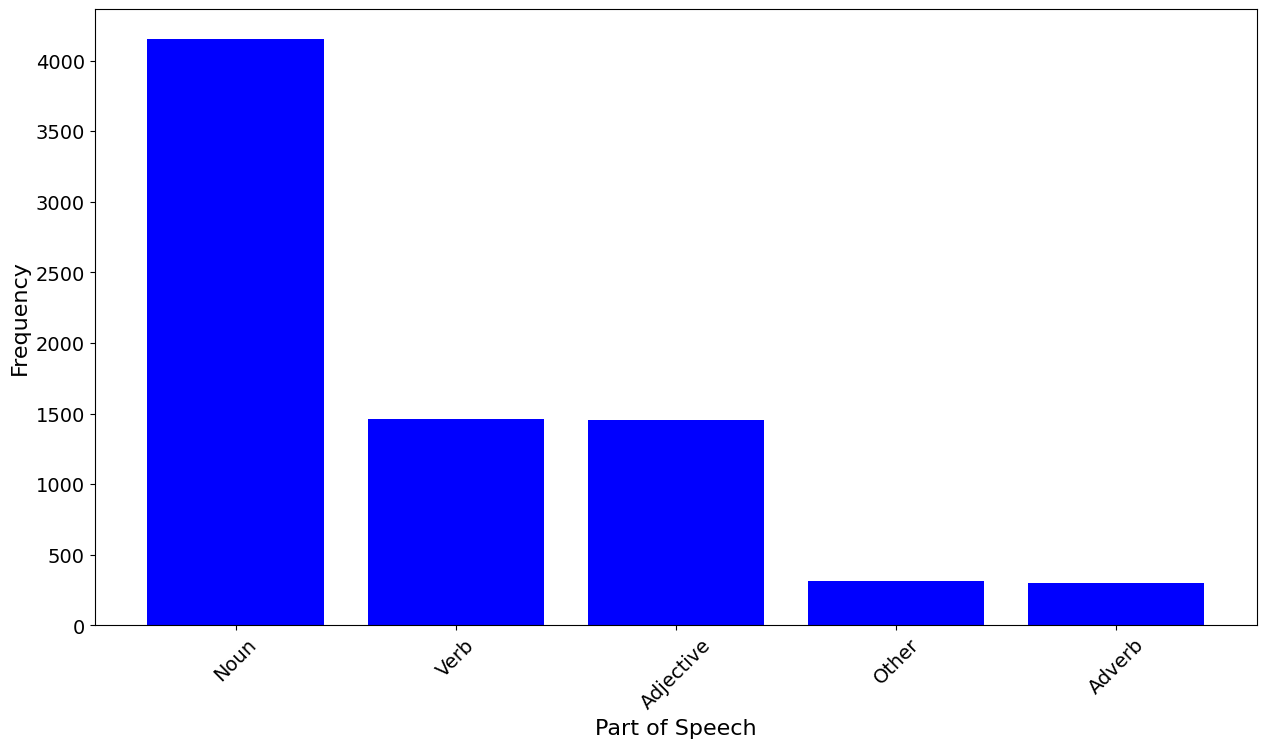

In [39]:
# Overall POS distribution plot
pos_freq = Counter(pos_tags)
labels, values = zip(*pos_freq.items())
plt.figure(figsize=(15, 8))
plt.bar(labels, values, color='blue')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Part of Speech', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
#plt.title('Overall POS Distribution')
plt.savefig('overall.eps', format='eps', dpi=300)
plt.show()

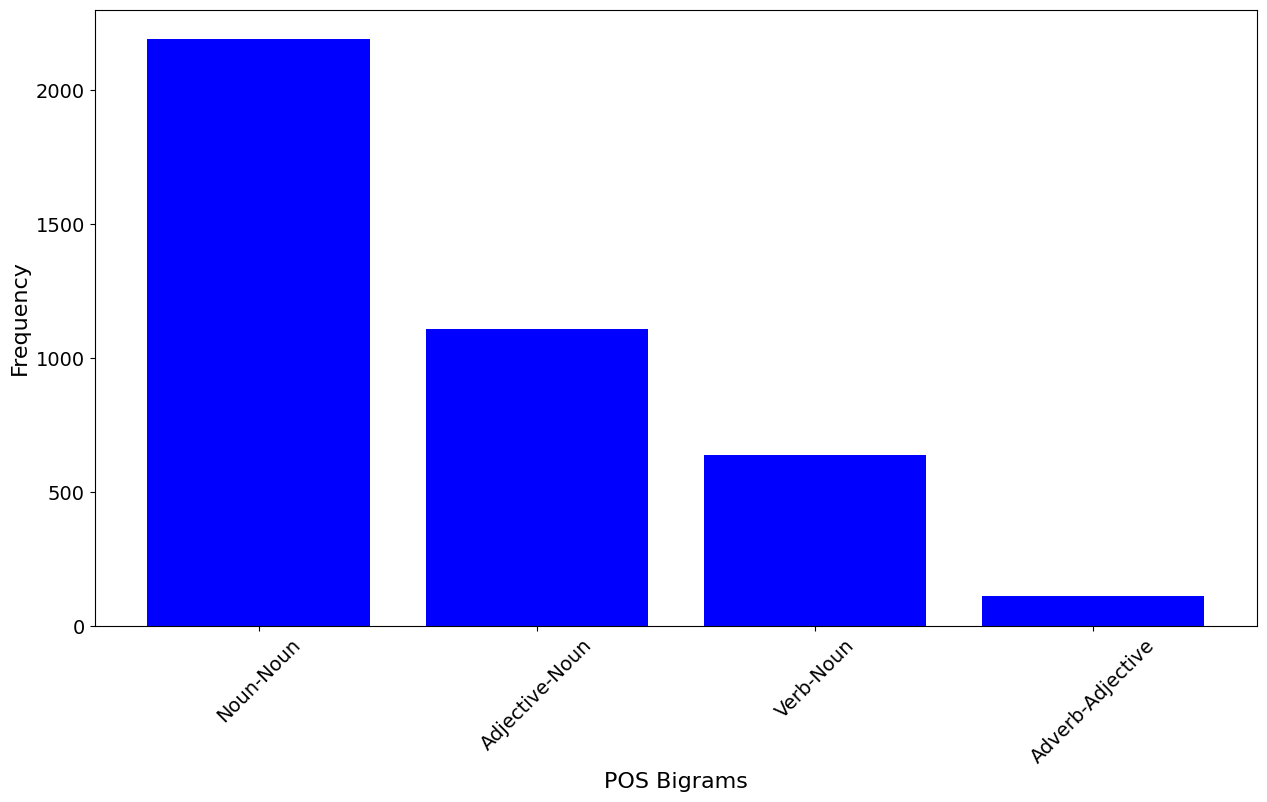

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Create bigrams from the POS tags
bigrams = [(pos_tags[i], pos_tags[i + 1]) for i in range(len(pos_tags) - 1)]

# Count the frequency of each bigram
bigram_freq = Counter(bigrams)

# Filter out the bigrams we are interested in
interesting_bigrams = [('Noun', 'Noun'), ('Adjective', 'Noun'), ('Verb', 'Noun'), ('Adverb', 'Adjective')]

# Prepare data for plotting
labels, values = [], []
for bigram in interesting_bigrams:
    labels.append(f"{bigram[0]}-{bigram[1]}")
    values.append(bigram_freq.get(bigram, 0))
    
# Increase font size of x-axis and y-axis numbers

# Generate the bar plot
plt.figure(figsize=(15, 8))
plt.bar(labels, values, color='blue')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('POS Bigrams', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
#plt.title('Frequency of Selected POS Bigrams')
# Save the figure as an EPS file
plt.savefig('histcoll.eps', format='eps', dpi=300)
plt.show()

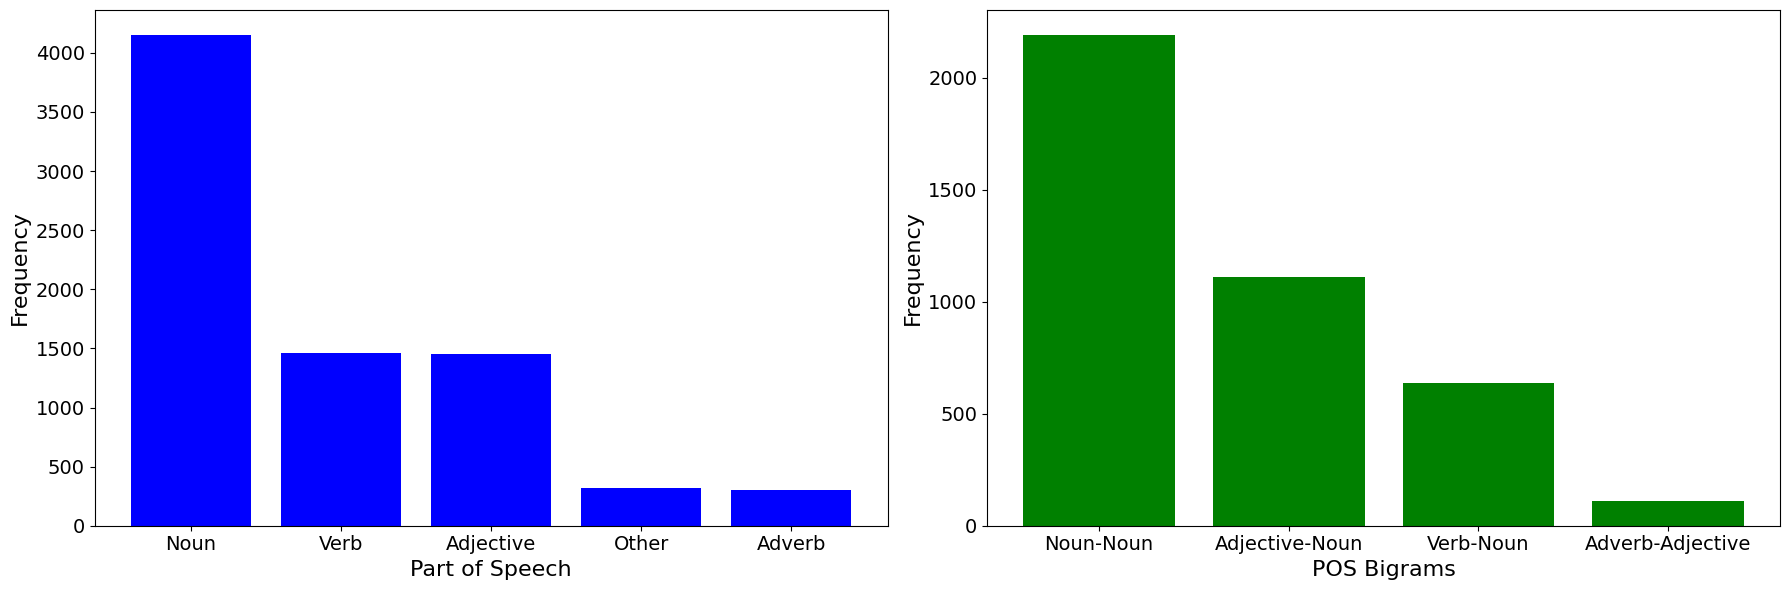

In [49]:
from collections import Counter
import matplotlib.pyplot as plt

# Create bigrams from the POS tags
bigrams = [(pos_tags[i], pos_tags[i + 1]) for i in range(len(pos_tags) - 1)]

# Count the frequency of each bigram
bigram_freq = Counter(bigrams)

# Filter out the bigrams we are interested in
interesting_bigrams = [('Noun', 'Noun'), ('Adjective', 'Noun'), ('Verb', 'Noun'), ('Adverb', 'Adjective')]

# Prepare data for plotting
labels1, values1 = [], []
for bigram in interesting_bigrams:
    labels1.append(f"{bigram[0]}-{bigram[1]}")
    values1.append(bigram_freq.get(bigram, 0))

# Overall POS distribution data
labels2, values2 = zip(*Counter(pos_tags).items())

# Generate the side-by-side plots
plt.figure(figsize=(18, 6))

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.bar(labels2, values2, color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Part of Speech', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.bar(labels1, values1, color='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('POS Bigrams', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Save the figure as an EPS file
plt.savefig('side_by_side.eps', format='eps', dpi=300)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

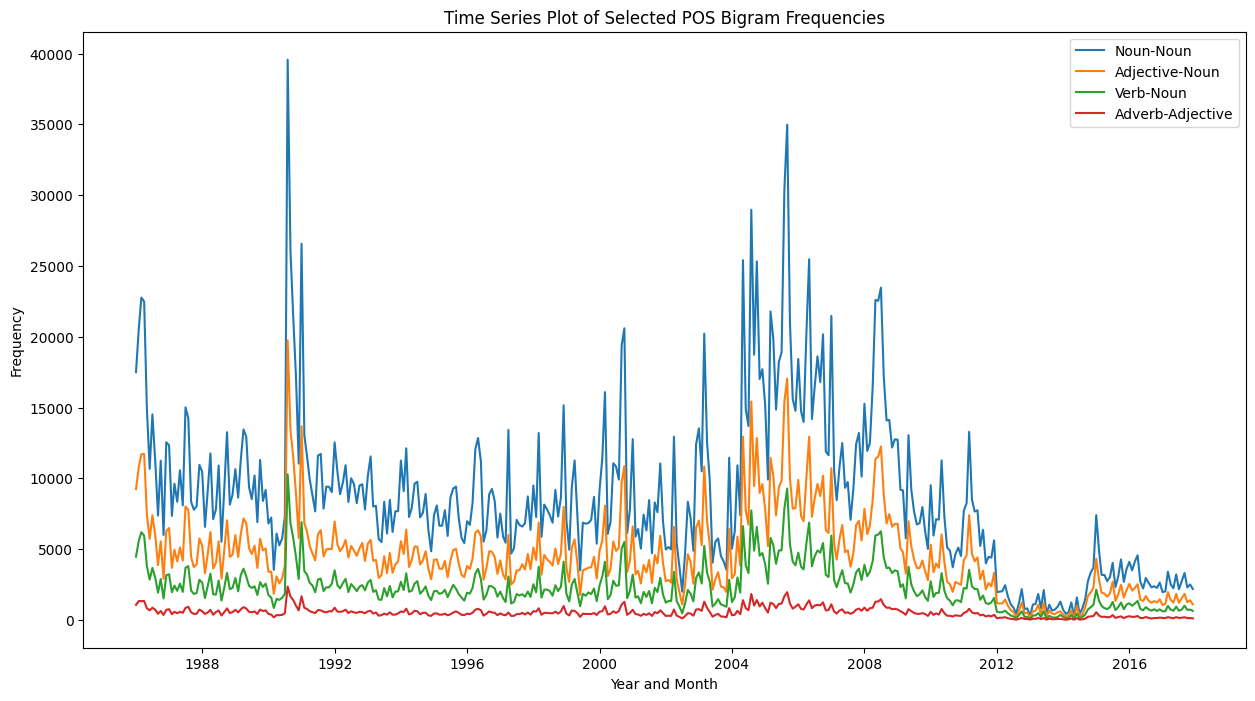

In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk

df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.sort_values('YearMonth', inplace=True)

# NLTK POS tagging
def nltk_pos_tag(word_list):
    tagged = nltk.pos_tag(word_list)
    simplified_tags = []
    for word, tag in tagged:
        if tag.startswith('N'):
            simplified_tags.append('Noun')
        elif tag.startswith('V'):
            simplified_tags.append('Verb')
        elif tag.startswith('J'):
            simplified_tags.append('Adjective')
        elif tag.startswith('R'):
            simplified_tags.append('Adverb')
        else:
            simplified_tags.append('Other')
    return simplified_tags

# Assuming df is your DataFrame and it has a 'YearMonth' column for time and 'cleaned_Text' for text
# Count the POS bigram frequencies for each time period
time_series_data = {}
interesting_bigrams = [('Noun', 'Noun'), ('Adjective', 'Noun'), ('Verb', 'Noun'), ('Adverb', 'Adjective')]

for time_period, text in df.groupby('YearMonth')['cleaned_Text'].apply(' '.join).iteritems():
    words = nltk.word_tokenize(text.lower())
    pos_tags = nltk_pos_tag(words)
    bigrams = [(pos_tags[i], pos_tags[i + 1]) for i in range(len(pos_tags) - 1)]
    bigram_freq = Counter(bigrams)
    
    time_series_data[time_period] = {bigram: bigram_freq.get(bigram, 0) for bigram in interesting_bigrams}

# Convert the dictionary to a DataFrame for plotting
time_series_df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Generate the time series plot
plt.figure(figsize=(15, 8))
for bigram in interesting_bigrams:
    plt.plot(time_series_df.index, time_series_df[bigram], label=f"{bigram[0]}-{bigram[1]}")

plt.xlabel('Year and Month')
plt.ylabel('Frequency')
plt.title('Time Series Plot of Selected POS Bigram Frequencies')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


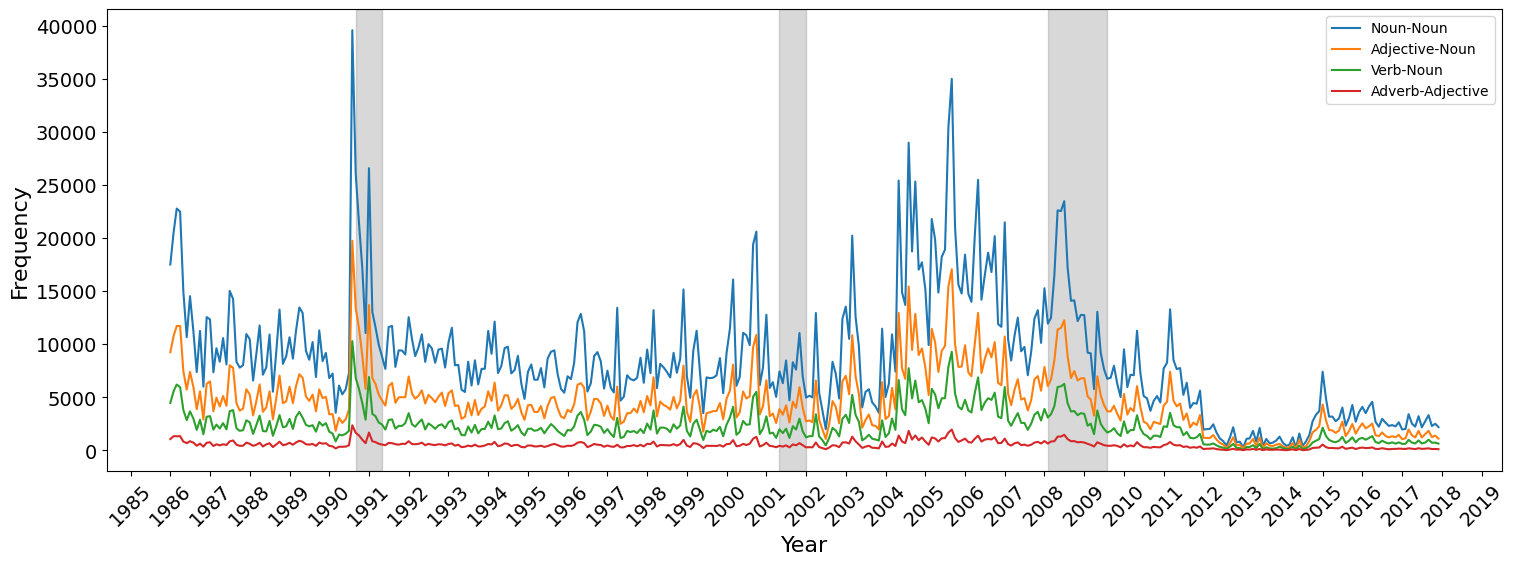

In [52]:
from fredapi import Fred
import matplotlib.dates as mdates

# Initialize Fred
fred = Fred(api_key='8c12312bfb1126571fa907077f4efe3c')

# Fetch recession data
recessions = fred.get_series('USREC', observation_start='1986-01-01', observation_end='2017-12-01')
recessions = recessions.resample('M').last().ffill()

# Convert 'YearMonth' column to pandas datetime object
time_series_df.index = pd.to_datetime(time_series_df.index)

# Generate the time series plot
plt.figure(figsize=(18, 6))

# Plot NBER recessions
for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    plt.axvspan(start, end, color='gray', alpha=0.3)

# Plot POS bigram frequencies
for bigram in interesting_bigrams:
    plt.plot(time_series_df.index, time_series_df[bigram], label=f"{bigram[0]}-{bigram[1]}")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
#plt.title('Time Series Plot of Selected POS Bigram Frequencies')

# Format the x-axis to show dates clearly
# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.legend()

# Save the figure as an EPS file
plt.savefig('collocationts.eps', format='eps', dpi=300)

plt.show()

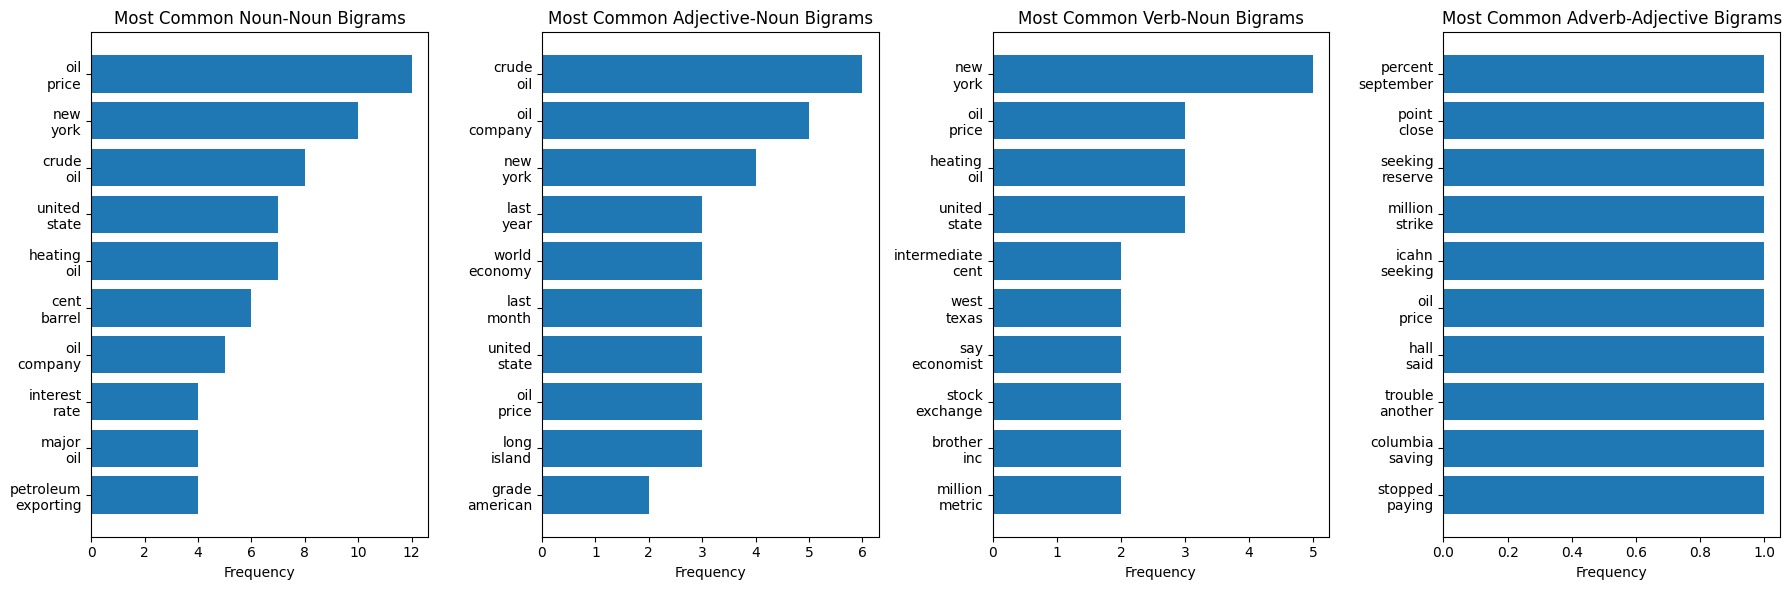

In [11]:
# Create bigrams and their POS tags
bigrams = list(zip(filtered_words[:-1], filtered_words[1:]))
bigram_pos_tags = list(zip(pos_tags[:-1], pos_tags[1:]))

# Common bigrams for specific POS combinations
interesting_pos_combinations = [('Noun', 'Noun'), ('Adjective', 'Noun'), ('Verb', 'Noun'), ('Adverb', 'Adjective')]
common_bigrams_by_pos = {}
for pos_combination in interesting_pos_combinations:
    filtered_bigrams = [bigram for bigram, bigram_pos in zip(bigrams, bigram_pos_tags) if bigram_pos == pos_combination]
    common_bigrams_by_pos[pos_combination] = Counter(filtered_bigrams).most_common(10)

# Plot common bigrams
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
for i, (pos_combination, ax) in enumerate(zip(interesting_pos_combinations, axs)):
    bigram_labels, bigram_values = zip(*common_bigrams_by_pos[pos_combination])
    bigram_labels = [f"{word1}\n{word2}" for word1, word2 in bigram_labels]
    ax.barh(bigram_labels, bigram_values)
    ax.set_xlabel('Frequency')
    ax.set_title(f"Most Common {pos_combination[0]}-{pos_combination[1]} Bigrams")
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabeyie\AppData\Roaming\nltk_data...


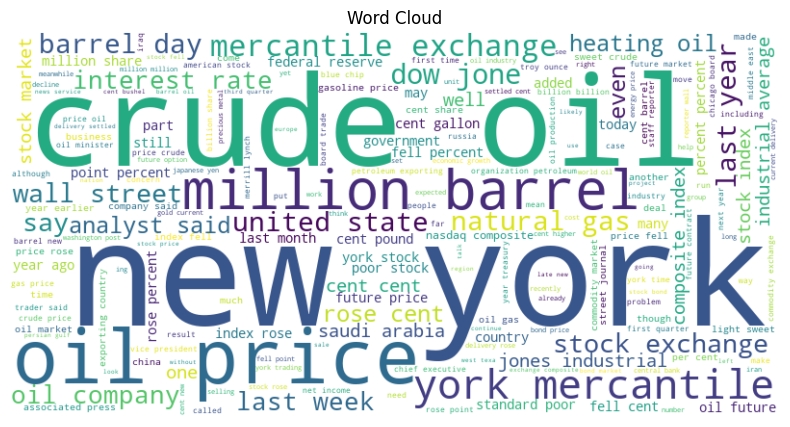

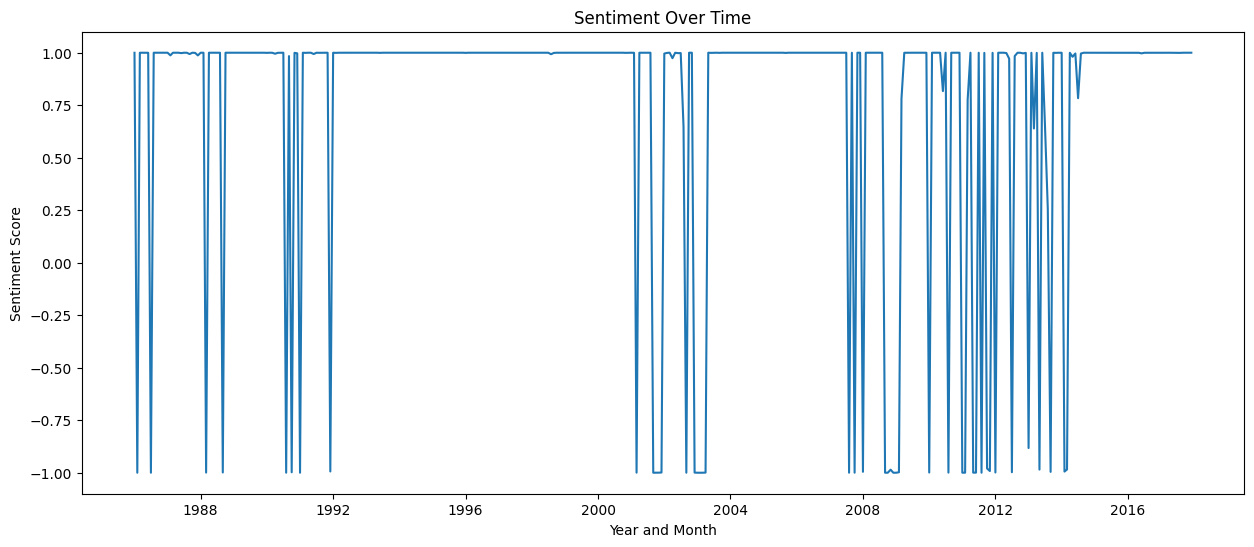

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Sample data (replace this with your actual DataFrame)
# df = ...

# Word Cloud
all_text = ' '.join(df['cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Sentiment Over Time (using VADER)
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(15, 6))
plt.plot(pd.to_datetime(df['YearMonth']), df['sentiment'])
plt.title('Sentiment Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Sentiment Score')
plt.show()

# Seasonal Decomposition
ts_data = df.groupby('YearMonth')['text_length'].mean()
ts_data.index = pd.to_datetime(ts_data.index)
result = seasonal_decompose(ts_data, model='additive', freq=12)
result.plot()
plt.show()

# Lag Plot
plt.figure()
lag_plot(ts_data)
plt.title('Lag Plot')
plt.show()

# Rolling Statistics
rolling_window = ts_data.rolling(window=12)
rolling_mean = rolling_window.mean()
rolling_std = rolling_window.std()
plt.figure(figsize=(15, 6))
plt.plot(ts_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Dev')
plt.legend()
plt.title('Rolling Statistics')
plt.show()

# Correlation Matrix (using text_length and sentiment for demonstration)
cor_matrix = df[['text_length', 'sentiment']].corr()
plt.figure(figsize=(6, 6))
plt.matshow(cor_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns, rotation=90)
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)
plt.show()

# Histogram of Text Length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

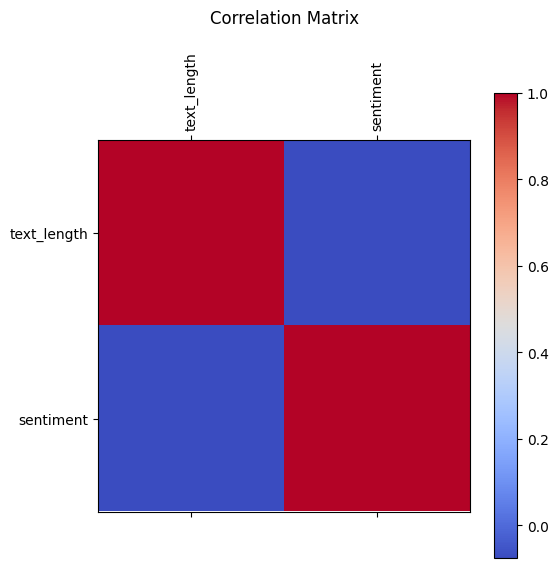

In [23]:
# Correlation Matrix (using text_length and sentiment for demonstration)
cor_matrix = df[['text_length', 'sentiment']].corr()
plt.figure(figsize=(6, 6))
plt.matshow(cor_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns, rotation=90)
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)
plt.show()

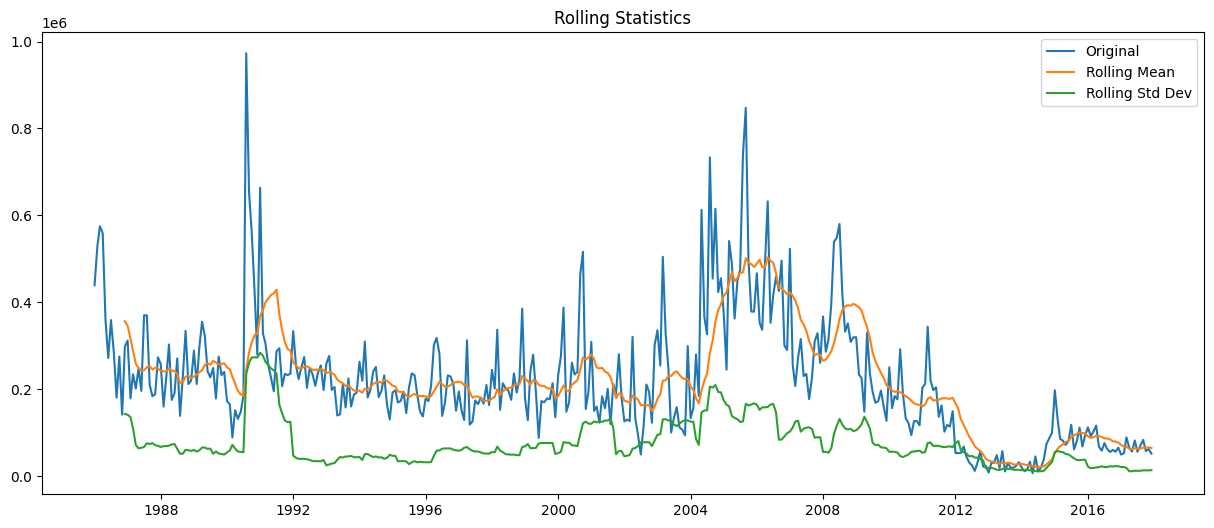

In [25]:
# Rolling Statistics
rolling_window = ts_data.rolling(window=12)
rolling_mean = rolling_window.mean()
rolling_std = rolling_window.std()
plt.figure(figsize=(15, 6))
plt.plot(ts_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Dev')
plt.legend()
plt.title('Rolling Statistics')
plt.show()

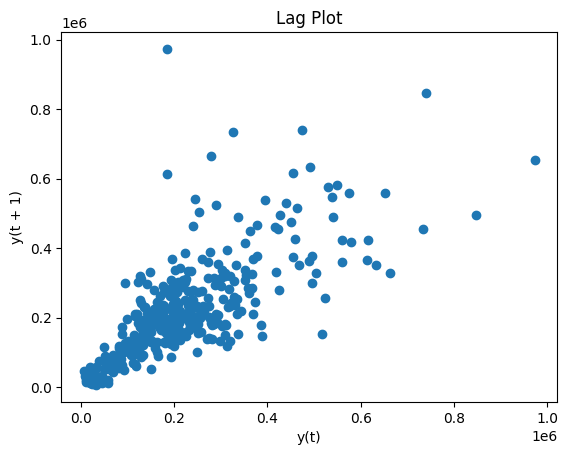

In [26]:
# Lag Plot
plt.figure()
lag_plot(ts_data)
plt.title('Lag Plot')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'result'

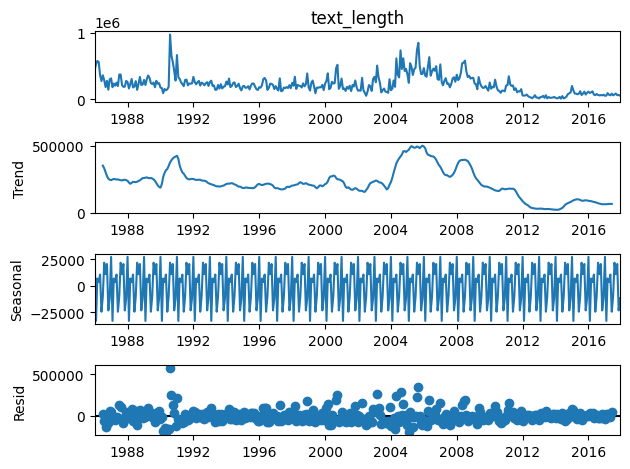

In [30]:
# Seasonal Decomposition
ts_data = df.groupby('YearMonth')['text_length'].mean()
ts_data.index = pd.to_datetime(ts_data.index)
result = seasonal_decompose(ts_data, model='additive')
result.plot()
plt.result(figsize=(15, 6))
plt.show()